Feature Preprocessing and Generation
====

Scaling
------

In [82]:
# Load data
from sklearn.datasets import load_breast_cancer
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

cancer = load_breast_cancer()

data = pd.DataFrame(cancer.data, columns = cancer.feature_names)
target = cancer.target
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [83]:
# preprocess data
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

minmax = MinMaxScaler()
minmax.fit(data)
data_minmax = minmax.transform(data)

standard = StandardScaler()
standard.fit(data)
data_standard = standard.transform(data)

# compare classifiers
classifiers = [log_reg, knn, nn, dtree]
name = ['Logistic Regression', 'KNeast Neighbors', 'Neural Network', 'Decision Tree']

def compare_classifiers(classifiers, name, data, target):
    X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=.25)
    
    blist = []
    for classifier, name in zip(classifiers, name):
        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)
        score = round(accuracy_score(y_test, y_pred), 3)
#         print(name, ':', score)
        blist.append(score)
        
    return blist
        
raw_data = compare_classifiers(classifiers, name, data, target)
minmax_data = compare_classifiers(classifiers, name, data_minmax, target)
standard_data = compare_classifiers(classifiers, name, data_standard, target)

# make dataframe of the results
results = pd.DataFrame([raw_data, minmax_data, standard_data], columns = name)
results.index = ['Raw', 'MinMax', 'Standard']
results = results.T
results

,Raw,MinMax,Standard
Logistic Regression,0.895,0.979,0.986
KNeast Neighbors,0.888,0.979,0.979
Neural Network,0.874,0.972,0.979
Decision Tree,0.909,0.951,0.937


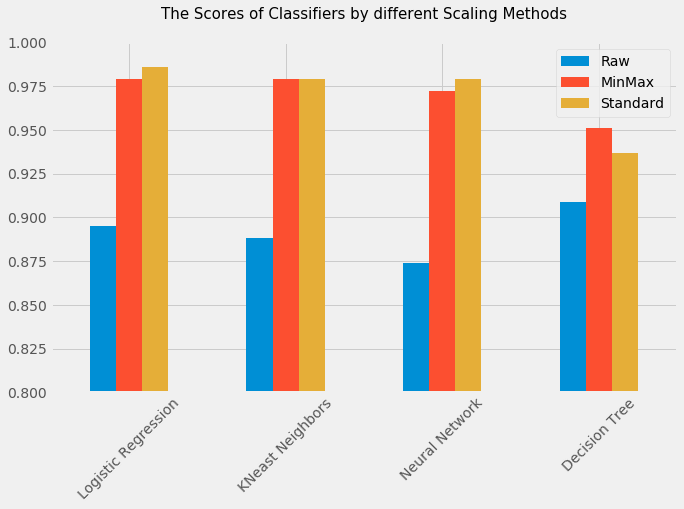

In [84]:
# visualize the results
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

ax = results.plot(kind='bar', figsize=(10, 6))
ax.set_ylim(0.8, 1.0)
ax.set_title("The Scores of Classifiers by different Scaling Methods\n", fontsize=15)
ax.set_xticklabels(name, rotation=45, fontsize=14)

plt.show()